# Loan Approval Risk Analysis 

## Introduction
In this analysis, conducted for Travis Loan Consultancy, we aim to predict loan approval risk using a comprehensive loan approval dataset comprised of residents from various states in India. This dataset provides detailed insights into the characteristics of loan applicants, capturing both numerical and categorical features. It encompasses various attributes such as demographic details, financial status, employment history, and ownership status. By leveraging this dataset, our objective is to develop predictive models that can accurately assess the risk associated with loan applicants.

Throughout this notebook, we will employ a variety of machine learning techniques, including Logistic Regression, Random Forest, and Gradient Boosting (XGBoost). We will experiment with different data balancing strategies, such as SMOTE (Synthetic Minority Over-sampling Technique) and Random Oversampling/Undersampling, to address the inherent class imbalance in our dataset. Furthermore, we will utilize GridSearchCV for hyperparameter tuning to optimize the performance of our models.

Our goal is to identify the most effective model and data balancing approach that maximizes the precision and recall of predicting high-risk loan applicants. By doing so, we aim to provide valuable insights that can aid Travis Loan Consultant in making informed decisions in the loan approval process, ultimately contributing to better risk management and more accurate loan assessments. Below are the questions we will be providing insights for:

#### 1. What are the key demographic and financial characteristics that differentiate high-risk and low-risk loan applicants?

#### 2. How do employment history and ownership history correlate with loan approval risk?

#### 3. Are there any significant patterns or trends in the distribution of loan applicants across different states in India?

# EDA
We start our analysis by importing the relevant packages for our analysis and then reading in our data using pandas.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings 
from sklearn.exceptions import ConvergenceWarning
# Filter warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Filter warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import time

In [9]:
df = pd.read_json('data/loan_approval_dataset.json')

We take a look at our data. We can see that there are features of Income, Age, Experience, Married/Single, House_Ownership, Car_Ownership, Profession, CITY, STATE, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, and Risk_Flag.

In [10]:
df.head(15)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


We can see that we have numeric and categorical values in our data. Now lets check to see if we have any null values.

In [12]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

There is no null values throughout the dataset so it is pretty clean. Lets look at some key demographics and compare them based on their Risk_Flag.

## Key Demographics
Lets look at some of our categorical features and see their correlation based off Risk_Flag. Our Risk_Flag feature consists of 0 and 1, where 0 is Non-Risky and 1 is Risky. We will use a count plot to show this correlation.

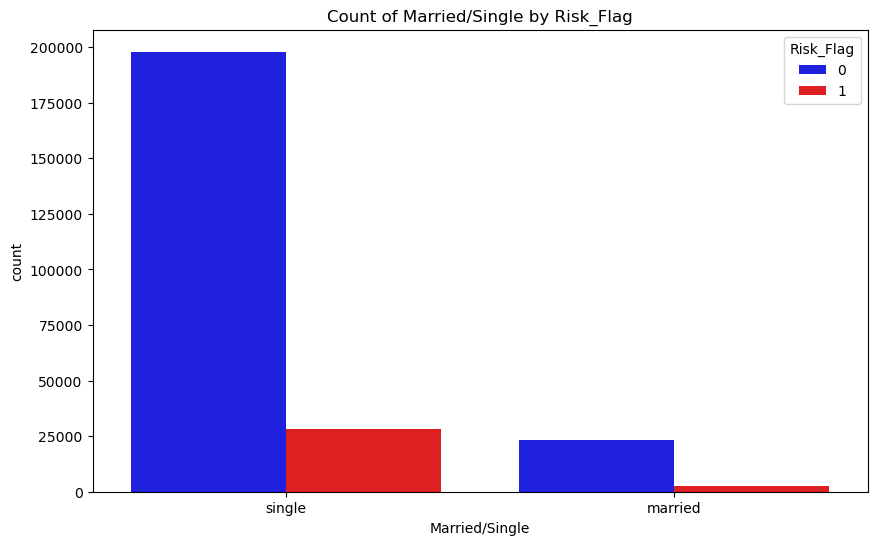

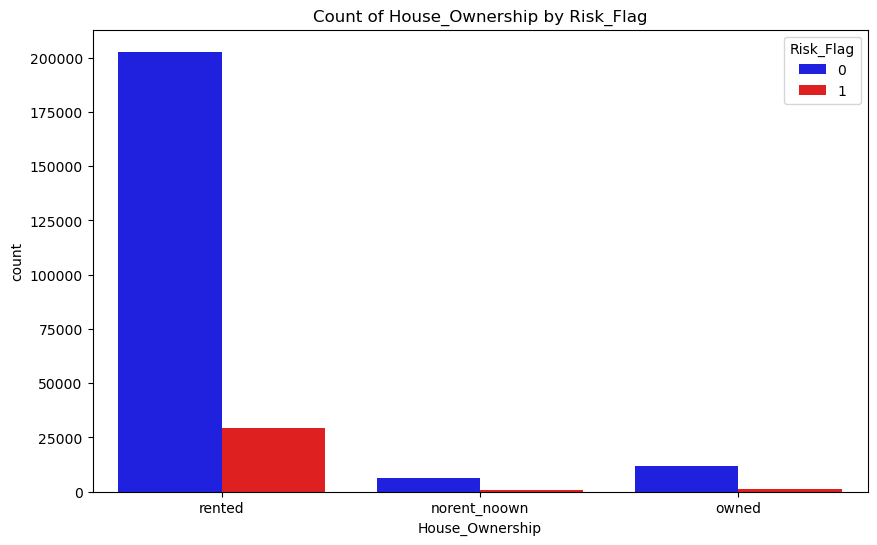

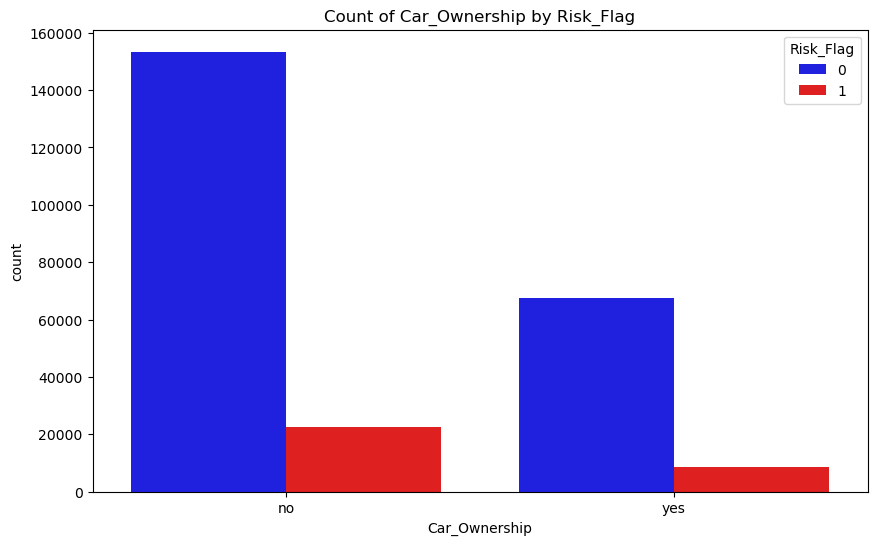

In [13]:
# Define custom colors
custom_palette = {
    0: 'blue',
    1: 'red'
}


# Categorical feature distribution
cat_features = ['Married/Single', 'House_Ownership', 'Car_Ownership']
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Risk_Flag', palette=custom_palette)
    plt.title(f'Count of {feature} by Risk_Flag')
    plt.xticks(rotation=0)
    plt.show()

As we analyze the three countplots for Married/Single, House_Ownership, and Car_Ownership, several key insights emerge:

#### Marital Status:
-  Single residents appear to be more risky compared to married residents. This observation suggests that marital status might be a significant factor in assessing loan risk.

#### House Ownership:
- Residents who rent their homes tend to be more risky compared to those who either own their homes or fall into the 'nor own/rent' category. This indicates that home ownership status could play a crucial role in determining the risk profile of loan applicants.

#### Car Ownership:
- Residents who do not own a car seem to be more risky compared to those who own a car. This suggests that car ownership might be associated with lower risk levels, potentially reflecting better financial stability.

Lets look at some more key characteristics that are numerical.

### Income Percentage 
We can now analyze the income distribution based on the Risk_Flag by grouping the incomes into defined sections. By calculating the percentages of each income group, we can plot and compare the risk levels across these groups. This analysis will provide insights into how income levels correlate with loan approval risks.

In [14]:
# Calculate the value counts of the 'Income' column and update the DataFrame inplace
df['Income'].value_counts().sort_index(ascending=False)


Income
9999938     1
9999400     1
9999180    36
9998280     1
9998070    34
           ..
11483       1
11430      37
11114      36
10675      37
10310      37
Name: count, Length: 41920, dtype: int64

In [15]:
# Create a new DataFrame with just the 'Income' column
df_income = pd.DataFrame(df['Income'])

# Categorize incomes into groups
df['Income_Group'] = pd.cut(df_income['Income'], bins=[0, 2000000, 4000000, 6000000, 8000000, 10000000],
                            labels=['0-1999999', '2000000-3999999', '4000000-5999999', '6000000-7999999', '8000000-9999999'])

# Display the DataFrame with the new column
df.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Group
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0-1999999
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,6000000-7999999
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,2000000-3999999
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,6000000-7999999
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,4000000-5999999


We have created a new column to categorize the different income groups. Now, we can calculate the percentages of each income group based on their Risk_Flag.

In [16]:
# Filter the DataFrame for rows where 'Risk_Flag' is 1
income_risk_1 = df[df['Risk_Flag'] == 1]

# Group by 'Income_Group' and calculate the percentage for each group
percentage_inc = (income_risk_1.groupby('Income_Group').size() / df.groupby('Income_Group').size()) * 100

# Print the percentages for each 'Income_Group'
for Income_group, percentage in percentage_inc.items():
    print(f"The percentage of people in the income group {Income_group} with Risk_Flag of 1 is: {percentage:.2f}%")


The percentage of people in the income group 0-1999999 with Risk_Flag of 1 is: 13.17%
The percentage of people in the income group 2000000-3999999 with Risk_Flag of 1 is: 11.51%
The percentage of people in the income group 4000000-5999999 with Risk_Flag of 1 is: 12.35%
The percentage of people in the income group 6000000-7999999 with Risk_Flag of 1 is: 11.79%
The percentage of people in the income group 8000000-9999999 with Risk_Flag of 1 is: 12.71%


In [17]:
# Filter the DataFrame for rows where 'Risk_Flag' is 0
income_risk_0 = df[df['Risk_Flag'] == 0]

# Group by 'Income_Group' and calculate the percentage for each group
percentage_inc_0 = (income_risk_0.groupby('Income_Group').size() / df.groupby('Income_Group').size()) * 100

# Print the percentages for each 'Income_Group'
for Income_group, percentage in percentage_inc_0.items():
    print(f"The percentage of people in the income group {Income_group} with Risk_Flag of 0 is: {percentage:.2f}%")


The percentage of people in the income group 0-1999999 with Risk_Flag of 0 is: 86.83%
The percentage of people in the income group 2000000-3999999 with Risk_Flag of 0 is: 88.49%
The percentage of people in the income group 4000000-5999999 with Risk_Flag of 0 is: 87.65%
The percentage of people in the income group 6000000-7999999 with Risk_Flag of 0 is: 88.21%
The percentage of people in the income group 8000000-9999999 with Risk_Flag of 0 is: 87.29%


Now that we have the percentages of each group based on their Risk_Flag, we can now visualize these to better compare.

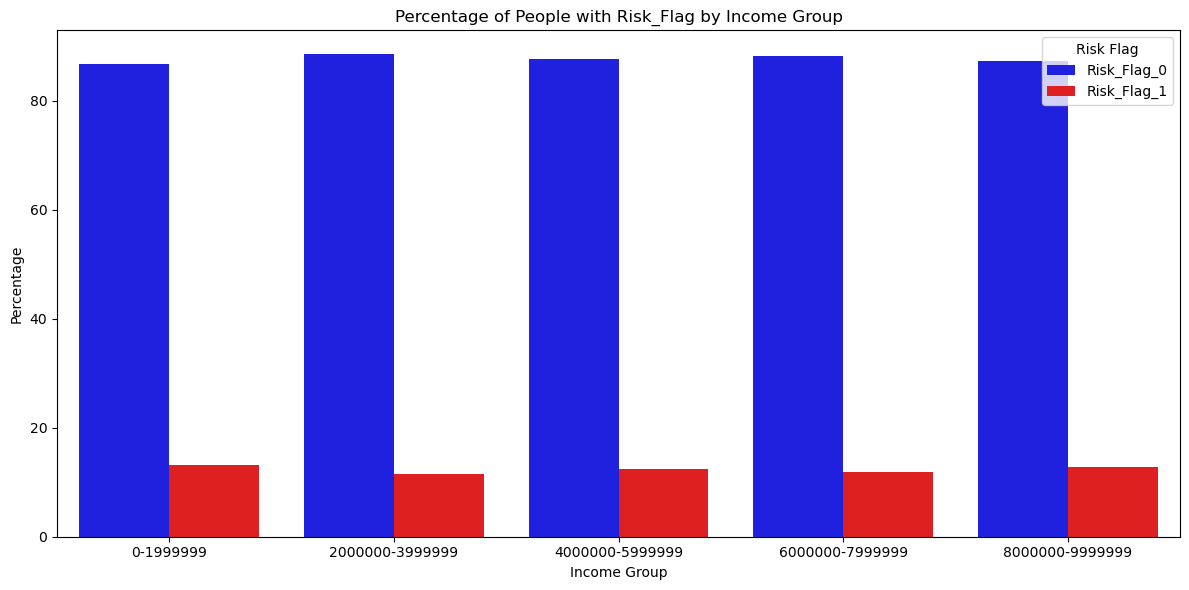

In [18]:
# Create a DataFrame for plotting
percentage_inc_df = pd.DataFrame({
    'Income_Group': percentage_inc_0.index,
    'Risk_Flag_0': percentage_inc_0.values,
    'Risk_Flag_1': percentage_inc.values
})

# Melt the DataFrame for Seaborn
percentage_inc_melted = percentage_inc_df.melt(id_vars='Income_Group', value_vars=['Risk_Flag_0', 'Risk_Flag_1'],
                                               var_name='Risk_Flag', value_name='Percentage')

# Define custom colors
custom_palette = {
    'Risk_Flag_0': 'blue',
    'Risk_Flag_1': 'red'
}

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_inc_melted, x='Income_Group', y='Percentage', hue='Risk_Flag', palette = custom_palette)

plt.xlabel('Income Group')
plt.ylabel('Percentage')
plt.title('Percentage of People with Risk_Flag by Income Group')
plt.legend(title='Risk Flag')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


From the visualization, it is evident that the majority of applicants in all income groups are classified as non-risky (represented by blue bars), with the proportion of risky applicants (represented by red bars) remaining relatively low and consistent across different income ranges. This consistent pattern across income groups suggests that income alone may not be a strong differentiator for loan risk classification. Further analysis and modeling are necessary to identify the most significant factors contributing to loan risk.

Let's now examine how the age of applicants correlates with their loan risk status (Risk_Flag).

### Age Percentage 

In [19]:
df['Age'].value_counts().sort_index()

Age
21    4205
22    4430
23    4322
24    4326
25    4543
26    4156
27    5197
28    3901
29    4109
30    4468
31    4257
32    3834
33    4921
34    4414
35    4643
36    3444
37    4153
38    3793
39    3800
40    4233
41    4827
42    4134
43    4206
44    3622
45    4806
46    3627
47    4483
48    4967
49    4203
50    4624
51    3397
52    3197
53    4490
54    4785
55    4563
56    4344
57    4394
58    4368
59    4498
60    4504
61    4235
62    4311
63    3942
64    4132
65    3969
66    5092
67    3995
68    4772
69    4617
70    4251
71    4150
72    4533
73    3569
74    3954
75    3829
76    4585
77    3916
78    4455
79    4505
Name: count, dtype: int64

In [20]:
df_agegroup = pd.DataFrame(df['Age'])

# Categorize ages by 10 years into a new column
df['Age_Group'] = pd.cut(df_agegroup['Age'], bins=range(20, 90, 10), labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

# Display the DataFrame with the new column
df.head()


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Group,Age_Group
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0-1999999,20-29
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,6000000-7999999,30-39
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,2000000-3999999,60-69
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,6000000-7999999,40-49
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,4000000-5999999,40-49


In [21]:
# Filter the DataFrame for rows where 'Risk_Flag' is 1
age_risk_1 = df[df['Risk_Flag'] == 1]

# Group by 'Age_Group' and calculate the percentage for each group
percentage_age = (age_risk_1.groupby('Age_Group').size() / df.groupby('Age_Group').size()) * 100

# Print the percentages for each 'Age_Group'
for age_group, percentage in percentage_age.items():
    print(f"The percentage of people aged {age_group} with Risk_Flag of 1 is: {percentage:.2f}%")


The percentage of people aged 20-29 with Risk_Flag of 1 is: 14.47%
The percentage of people aged 30-39 with Risk_Flag of 1 is: 11.74%
The percentage of people aged 40-49 with Risk_Flag of 1 is: 12.03%
The percentage of people aged 50-59 with Risk_Flag of 1 is: 12.06%
The percentage of people aged 60-69 with Risk_Flag of 1 is: 11.54%
The percentage of people aged 70-79 with Risk_Flag of 1 is: 11.86%


In [22]:
# Filter the DataFrame for rows where 'Risk_Flag' is 0
age_risk_0 = df[df['Risk_Flag'] == 0]

# Group by 'Age_Group' and calculate the percentage for each group
percentage_age0 = (age_risk_0.groupby('Age_Group').size() / df.groupby('Age_Group').size()) * 100

# Print the percentages for each 'Age_Group'
for age_group, percentage in percentage_age0.items():
    print(f"The percentage of people in the age group {age_group} with Risk_Flag of 0 is: {percentage:.2f}%")


The percentage of people in the age group 20-29 with Risk_Flag of 0 is: 85.53%
The percentage of people in the age group 30-39 with Risk_Flag of 0 is: 88.26%
The percentage of people in the age group 40-49 with Risk_Flag of 0 is: 87.97%
The percentage of people in the age group 50-59 with Risk_Flag of 0 is: 87.94%
The percentage of people in the age group 60-69 with Risk_Flag of 0 is: 88.46%
The percentage of people in the age group 70-79 with Risk_Flag of 0 is: 88.14%


Now that we have the percentages of each group based on their Risk_Flag, we can now visualize these to better compare.

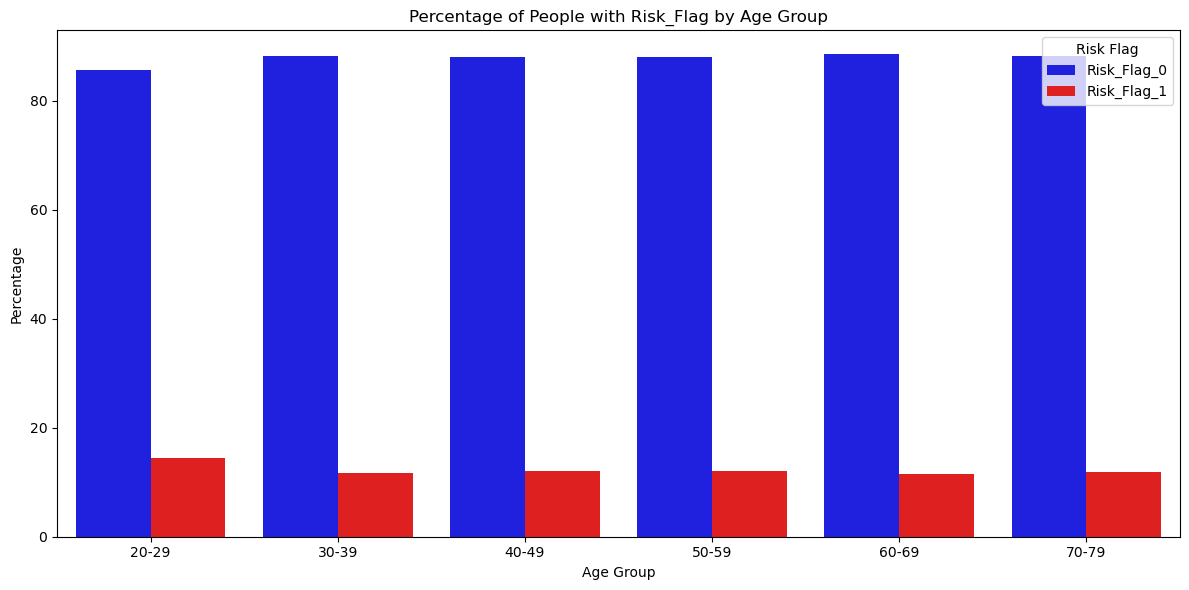

In [23]:
# Filter the DataFrame for rows where 'Risk_Flag' is 0 and 1
age_risk_0 = df[df['Risk_Flag'] == 0]
age_risk_1 = df[df['Risk_Flag'] == 1]

# Group by 'Age_Group' and calculate the percentage for each group
percentage_age_0 = (age_risk_0.groupby('Age_Group').size() / df.groupby('Age_Group').size()) * 100
percentage_age_1 = (age_risk_1.groupby('Age_Group').size() / df.groupby('Age_Group').size()) * 100

# Plot the percentages

# Create a DataFrame for plotting
percentage_age_df = pd.DataFrame({
    'Age_Group': percentage_age_0.index,
    'Risk_Flag_0': percentage_age_0.values,
    'Risk_Flag_1': percentage_age_1.values
})

# Melt the DataFrame for Seaborn
percentage_age_melted = percentage_age_df.melt(id_vars='Age_Group', value_vars=['Risk_Flag_0', 'Risk_Flag_1'],
                                               var_name='Risk_Flag', value_name='Percentage')

# Define custom colors
custom_palette = {
    'Risk_Flag_0': 'blue',
    'Risk_Flag_1': 'red'
}

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_age_melted, x='Age_Group', y='Percentage', hue='Risk_Flag', palette=custom_palette)

plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of People with Risk_Flag by Age Group')
plt.legend(title='Risk Flag')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Similar to the income analysis, the age analysis reveals that the majority of applicants in all age groups are classified as non-risky. The proportion of risky applicants remains relatively low and consistent across the different age groups. This consistency suggests that age alone may not be a significant predictor of loan risk. Further analysis is needed to explore the interaction between age and other features in influencing loan risk.

Let's now examine how the number of experience years of applicants correlates with their loan risk status (Risk_Flag).

### Experience 

In [24]:
df['Experience'].value_counts().sort_index()

Experience
0     11043
1     11575
2     11087
3     12069
4     11807
5     12441
6     13158
7     11232
8     11350
9     12936
10    12503
11    11449
12    12800
13    11713
14    12369
15    11993
16    12106
17    12131
18    12601
19    12287
20    11350
Name: count, dtype: int64

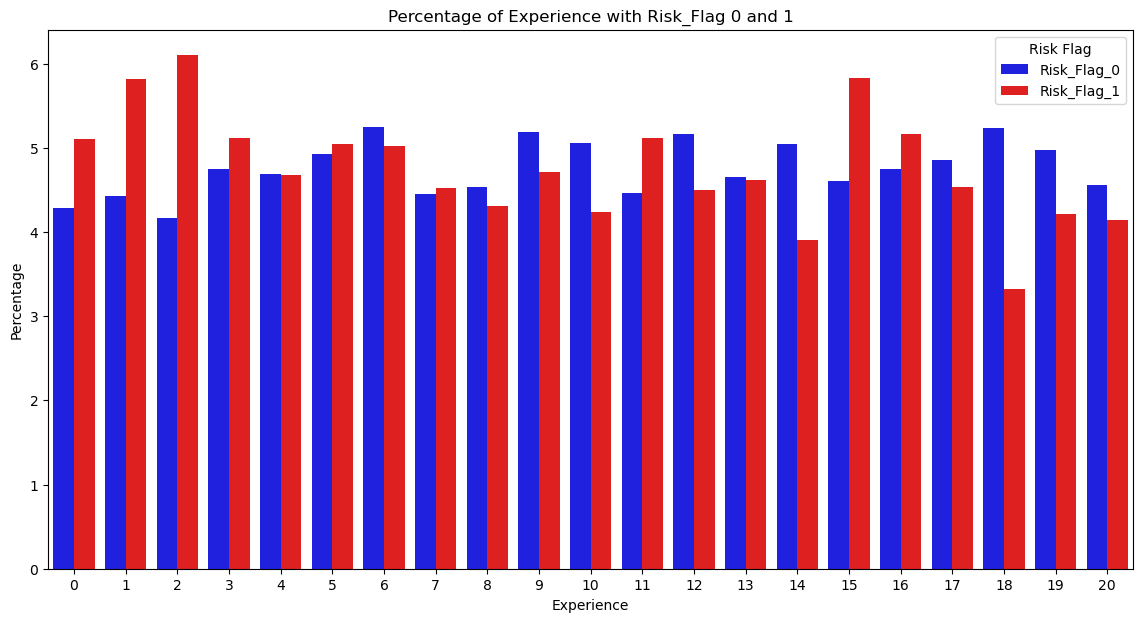

In [25]:
experience_counts_0 = df[df['Risk_Flag'] == 0]['Experience'].value_counts().sort_index()
experience_counts_1 = df[df['Risk_Flag'] == 1]['Experience'].value_counts().sort_index()

# Calculate percentages
experience_percent_0 = (experience_counts_0 / experience_counts_0.sum()) * 100
experience_percent_1 = (experience_counts_1 / experience_counts_1.sum()) * 100

# Create a DataFrame for plotting
experience_df = pd.DataFrame({
    'Experience': experience_percent_0.index,
    'Risk_Flag_0': experience_percent_0.values,
    'Risk_Flag_1': experience_percent_1.values
})

# Melt the DataFrame for Seaborn
experience_melted = experience_df.melt(id_vars='Experience', value_vars=['Risk_Flag_0', 'Risk_Flag_1'],
                                       var_name='Risk_Flag', value_name='Percentage')

# Define custom colors
custom_palette = {
    'Risk_Flag_0': 'blue',
    'Risk_Flag_1': 'red'
}

# Plotting with Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=experience_melted, x='Experience', y='Percentage', hue='Risk_Flag', palette=custom_palette)

plt.xlabel('Experience')
plt.ylabel('Percentage')
plt.title('Percentage of Experience with Risk_Flag 0 and 1')
plt.legend(title='Risk Flag')
plt.show()


From the visualization, we observe the following trends:

- The distribution of risky (Risk_Flag=1, represented by red bars) and non-risky (Risk_Flag=0, represented by blue bars) applicants varies across different experience years.
- In several experience groups, the proportion of risky applicants is higher than the proportion of non-risky applicants, particularly in the lower experience ranges (0-4 years).
- Conversely, in some other experience groups, non-risky applicants dominate, indicating that the relationship between experience and risk status is not linear or straightforward.

# Employment history and Ownership history
We now can look at employment history and ownership history and how they correlate with loan approval risk.

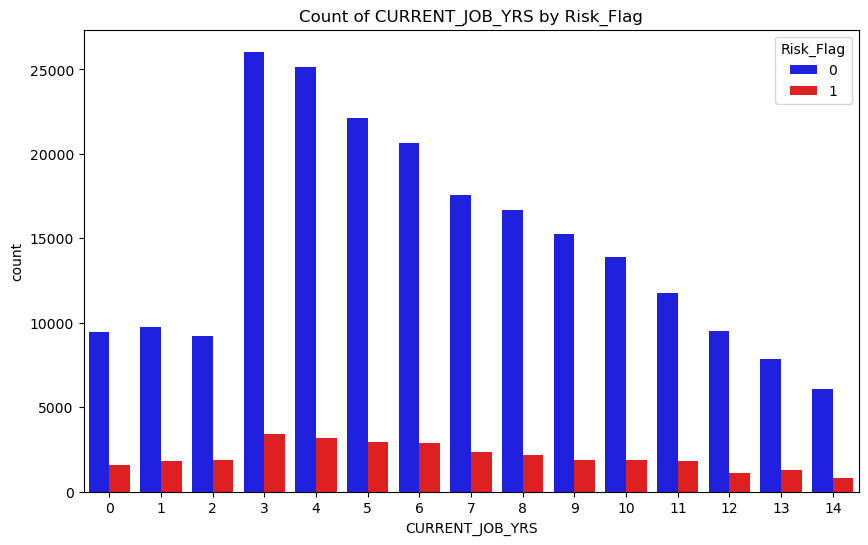

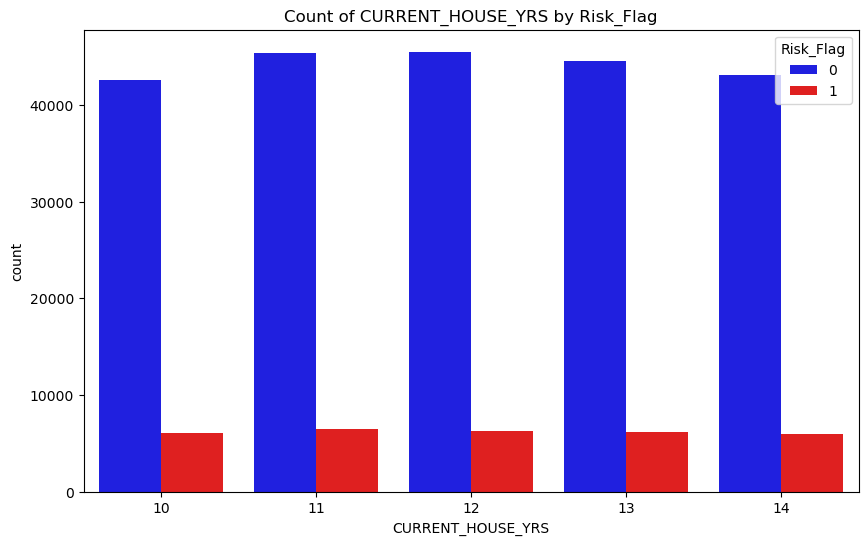

In [26]:
# Define custom colors
custom_palette = {
    0: 'blue',
    1: 'red'
}

# Employment history distribution
emp_features = ['CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
for feature in emp_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Risk_Flag', palette=custom_palette)
    plt.title(f'Count of {feature} by Risk_Flag')
    plt.xticks(rotation=0)
    plt.show()


#### Employment History and Risk_Flag:

The first plot shows the percentage distribution of loan applicants across different employment history groups, segmented by their loan risk status.

- The blue bars represent the count of non-risky applicants (Risk_Flag=0), while the red bars represent the count of risky applicants (Risk_Flag=1).
- We observe that most applicants with varying years of employment history are classified as non-risky.
- Interestingly, the count of non-risky applicants peaks around 3-5 years of current job experience, and then gradually decreases with more years of experience. In contrast, the proportion of risky applicants remains relatively consistent across different employment years.

#### Ownership History and Risk_Flag:

The second plot shows the percentage distribution of loan applicants across different ownership history groups, segmented by their loan risk status.

- Similar to the employment history analysis, the blue bars represent the count of non-risky applicants, while the red bars represent the count of risky applicants.
- Across all ownership history groups, the majority of applicants are classified as non-risky.
- The count of non-risky applicants is higher in all groups, indicating a relatively lower loan risk across different ownership durations.

These observations suggest that both employment history and ownership history have significant impacts on loan risk status. The employment history, particularly around 3-5 years of current job experience, shows a peak in non-risky applicants, while the ownership history indicates consistently higher counts of non-risky applicants across different durations.

### State-wise 
To gain a deeper understanding of the geographic distribution of loan applicants and their associated risk levels, we examine the state-wise distribution of loan applicants. The following plot illustrates the number of applicants from each state, categorized by their loan risk status (Risk_Flag). This analysis helps us identify any regional patterns or trends in loan approval risk.

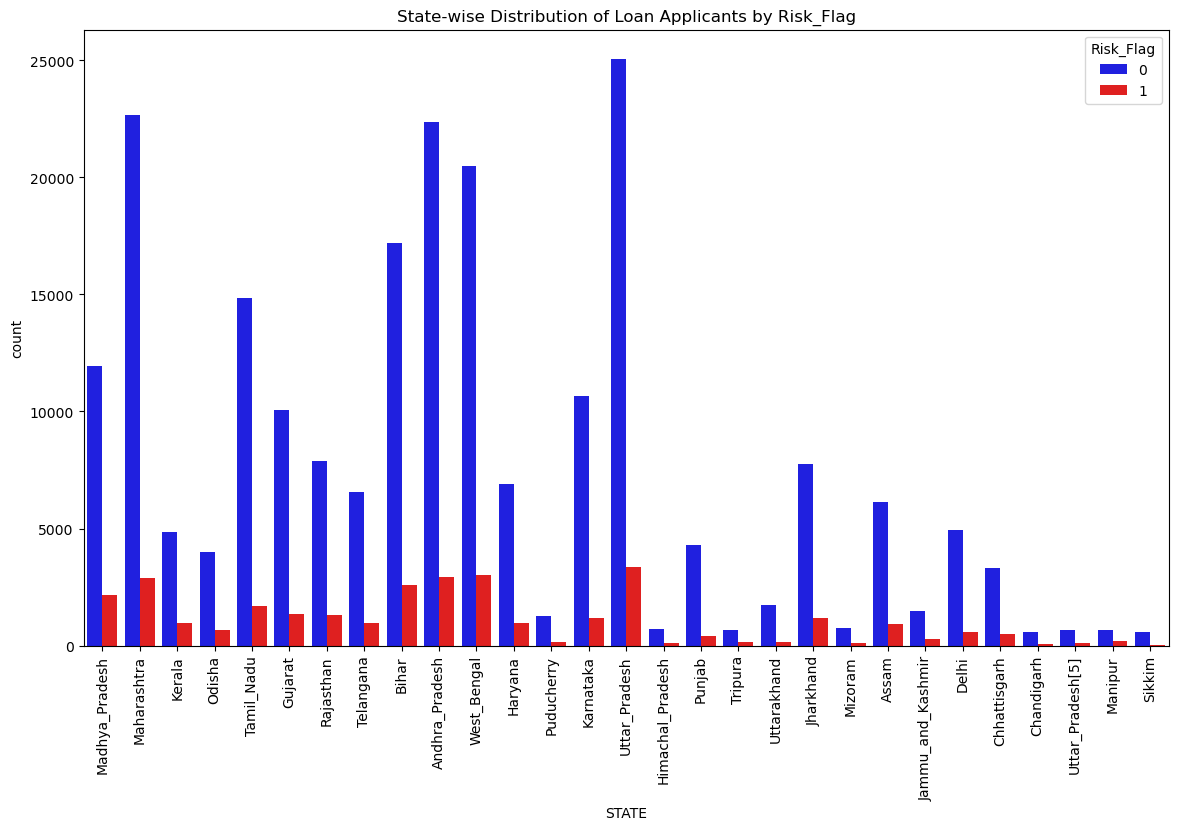

In [27]:
# Define custom colors
custom_palette = {
    0: 'blue',
    1: 'red'
}

# State-wise distribution
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='STATE', hue='Risk_Flag', palette=custom_palette)
plt.title('State-wise Distribution of Loan Applicants by Risk_Flag')
plt.xticks(rotation=90)
plt.show()

## From the visualization, we observe the following trends:

#### General Trend:
- In all states, the majority of applicants are classified as non-risky (represented by blue bars), while a smaller proportion of applicants are classified as risky (represented by red bars).
#### State-wise Variations: 
- Certain states such as Madhya Pradesh, Andhra Pradesh, and Uttar Pradesh show a significantly higher number of non-risky applicants compared to other states.
#### Risk Proportion Consistency:
- The proportion of risky applicants remains relatively low and consistent across most states. However, the absolute number of risky applicants varies depending on the total number of applicants from each state.
These observations suggest that while the majority of applicants across all states are non-risky, the total number of applicants and the absolute number of risky applicants vary significantly between states.

# EDA Conclusion 
#### 1. Key Demographic and Financial Characteristics Differentiating High-Risk and Low-Risk Loan Applicants:

Our analysis revealed several key demographic and financial characteristics that differentiate high-risk from low-risk loan applicants:

##### Income:
- Low-risk applicants generally have higher income levels across all income groups compared to high-risk applicants, although the proportion of high-risk applicants remains relatively consistent.
##### Age: 
- There is a consistent pattern across age groups where the majority of applicants are classified as low-risk. The proportion of high-risk applicants does not vary significantly with age.
##### Experience:
- The number of experience years shows variability in the proportion of high-risk and low-risk applicants. High-risk applicants are more prevalent in lower experience ranges (0-4 years), while low-risk applicants dominate across most experience groups.
##### Marital Status: 
- Single applicants have a higher count of both high-risk and low-risk applicants compared to married applicants. However, the proportion of high-risk applicants is higher among single applicants.
##### House Ownership:
- Applicants who rent their homes have a significantly higher count of both high-risk and low-risk applicants compared to those who own homes. High-risk applicants are more prevalent among renters.
##### Car Ownership:
- Applicants without car ownership have a higher count of both high-risk and low-risk applicants compared to those with car ownership. The proportion of high-risk applicants is higher among those without car ownership.

#### 2. Correlation of Employment History and Ownership History with Loan Approval Risk:

The analysis of employment history and ownership history provided insightful observations:

##### Employment History:
- The majority of applicants with varying years of employment history are classified as low-risk. There is a peak in low-risk applicants around 3-5 years of current job experience. High-risk applicants are consistently present across different employment years, indicating that employment history has an influence but is not the sole determinant of loan risk.
##### Ownership History:
- Across all ownership history groups, the count of low-risk applicants is consistently higher than that of high-risk applicants. This suggests that longer ownership history correlates with a lower loan approval risk.
#### 3. Significant Patterns or Trends in the Distribution of Loan Applicants Across Different States in India:

The state-wise distribution analysis revealed several significant patterns:

##### General Trend:
- In all states, the majority of applicants are classified as low-risk, with a smaller proportion of high-risk applicants.
State-wise Variations: Certain states, such as Madhya Pradesh, Andhra Pradesh, and Uttar Pradesh, have a significantly higher number of low-risk applicants compared to others. This could be attributed to the economic conditions, employment opportunities, and financial literacy levels in these states.
##### Risk Proportion Consistency:
- The proportion of high-risk applicants remains relatively low and consistent across most states, although the absolute number varies with the total number of applicants from each state.

#### Conclusion:

The exploratory data analysis highlights key demographic and financial characteristics that differentiate high-risk and low-risk loan applicants. Both employment history and ownership history correlate with loan approval risk, with low-risk applicants generally having more stable employment and longer ownership histories. Additionally, significant state-wise variations indicate that geographic location also plays a role in loan approval risk. These insights provide a foundation for developing predictive models to better assess loan risk based on applicant characteristics. Further analysis and modeling will help quantify these relationships and enhance the accuracy of risk prediction.

# Baseline Models
With the exploratory data analysis completed, we have identified key demographic and financial characteristics that differentiate high-risk and low-risk loan applicants. Our findings also highlight the impact of employment history, ownership history, and geographic location on loan approval risk.
We will begin our modeling process by developing baseline models to establish initial performance metrics. These baseline models will include:

- Logistic Regression
- Random Forest
- Gradient Boosting Machines


## Train/Test Data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np


# Split data into features (X) and target variable (y)
X = df.drop(['Id','Risk_Flag'], axis=1)
y = df['Risk_Flag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
df['Risk_Flag'].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

## Addressing Class Imbalance
Given the class imbalance in our dataset, with a significantly higher number of low-risk applicants compared to high-risk applicants, it is crucial to address this imbalance to improve model performance. We will start by evaluating the performance of our baseline models on the imbalanced dataset.

To enhance model performance and effectively handle class imbalance, we will employ the following strategies in this order:

#### Synthetic Minority Over-sampling Technique (SMOTE):
- Generate synthetic samples for the minority class (high-risk applicants) to balance the classes.
#### GridSearchCV: 
- Perform hyperparameter tuning using GridSearchCV to identify the best combination of hyperparameters for each model on the balanced dataset.
#### Random Oversampling: 
- Increase the number of high-risk applicants by randomly duplicating samples from the minority class.
#### Random Undersampling: 
- Decrease the number of low-risk applicants by randomly removing samples from the majority class.
These techniques will help us optimize our models and improve their ability to accurately predict loan risk.

## Preprocessing and Model Pipeline Setup
In this section, we set up the preprocessing steps for our data and integrate them into pipelines for our machine learning models.

#### Preprocessing Steps:

##### Numerical Features:
- We normalize numerical features ('Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS') using standard scaling to ensure each feature contributes equally to the model.

##### Categorical Features:
- We use one-hot encoding to transform categorical features ('Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'Income_Group', 'Age_Group') into a format that our models can work with.

#### Pipeline Creation:

##### Logistic Regression Pipeline:
- This pipeline combines the preprocessing steps with a Logistic Regression model. We use class_weight='balanced' to handle class imbalance by giving more weight to the minority class.

##### Random Forest Pipeline:
- This pipeline combines the preprocessing steps with a Random Forest Classifier. The classifier is set with a maximum depth of 5 to prevent overfitting, and a random state for reproducibility.

#### Fitting the Models:

We then fit both pipelines to our training data (X_train and y_train). This step applies the preprocessing steps to the training data and trains the models with the preprocessed data.

Using pipelines ensures that preprocessing is applied consistently during both training and prediction, leading to more reliable and accurate model performance.

In [30]:
# Define preprocessing for numerical and categorical features
numeric_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
numeric_transformer = StandardScaler()

categorical_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'Income_Group', 'Age_Group']
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
# Create a pipeline with preprocessing steps and models
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(max_depth=5, random_state=3))])


# Fit the model
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE', 'Income_Group',
                                                   'Age_Group'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, random_state=3))])

## Logistic Regression/ Random Forest Baseline Model
We can now evaluate the performance of our baseline models: Logistic Regression and Random Forest. By assessing these baseline models, we can establish initial performance metrics before applying more advanced techniques to handle class imbalance and optimize model parameters.

In [31]:
from sklearn.metrics import classification_report

# Make predictions
lr_pred = pipeline_lr.predict(X_test)
rf_pred = pipeline_rf.predict(X_test)


# Print classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred, zero_division=0))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, zero_division=0))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.00      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



#### Results:

The classification reports for both models are as follows:

#### Logistic Regression:

- The model shows a precision of 0.17 for the high-risk class (1), indicating a low proportion of true positives among the predicted positives. This suggests difficulty in correctly identifying high-risk applicants.
- Recall for the high-risk class is 0.62, meaning the model is relatively better at identifying the actual high-risk applicants but still misses a significant number of them.
- Overall accuracy is 58%, with performance skewed towards the majority class.

#### Random Forest:

- The model achieves high precision (0.88) and recall (1.00) for the low-risk class (0) but has zero precision, recall, and F1-score for the high-risk class (1), indicating it fails to identify any high-risk applicants.
- Overall accuracy is 88%, which reflects its strong performance on the majority class but poor performance on the minority class.

### Evaluation Metric:

Our primary evaluation metric is precision, particularly for the high-risk class, because we aim to minimize the number of false positives—incorrectly classifying low-risk applicants as high-risk. However, recall is also considered to ensure that we do not miss a significant number of actual high-risk applicants. The balance between precision and recall is crucial for effectively managing loan approval risk.

These results highlight the challenge posed by class imbalance, as the models perform well on the majority class but struggle with the minority class. This underscores the need for techniques like SMOTE, random oversampling, random undersampling, and hyperparameter tuning to improve model performance on the high-risk class.

## Logistic Regression/ Random Forest Using SMOTE

Now we address the class imbalance issue in our dataset using the SMOTE. We integrate SMOTE into our preprocessing and modeling pipelines for both Logistic Regression and Random Forest classifiers. By applying SMOTE, we aim to improve the models' ability to correctly identify high-risk applicants.

In [32]:
from imblearn.pipeline import Pipeline as imblearnPipeline
from imblearn.over_sampling import SMOTE

# Logistic Regression Pipeline with SMOTE
pipeline_lr_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))
])
# Random Forest Pipeline with SMOTE
pipeline_rf_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(max_depth=5, random_state=3))
])

# Fit the model with SMOTE
pipeline_lr_smote.fit(X_train, y_train)
pipeline_rf_smote.fit(X_train, y_train)

# Make predictions with the model using SMOTE
lr_smote_pred = pipeline_lr_smote.predict(X_test)
rf_smote_pred = pipeline_rf_smote.predict(X_test)


# Print classification report with SMOTE
print("\nLogistic Regression Classification Report with SMOTE:")
print(classification_report(y_test, lr_smote_pred, zero_division=0))
print("\nRandom Forest Classification Report with SMOTE:")
print(classification_report(y_test, rf_smote_pred, zero_division=0))



Logistic Regression Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400


Random Forest Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71     44147
           1       0.17      0.60      0.26      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400



#### Results:

The classification reports for both models after applying SMOTE are as follows:

#### Logistic Regression:

- Precision for the high-risk class (1) is 0.17, indicating a low proportion of true positives among predicted positives.
- Recall for the high-risk class is 0.62, showing the model's ability to identify actual high-risk applicants.
- Overall accuracy is 58%, similar to the baseline model.

#### Random Forest:

- Precision for the high-risk class (1) is 0.17, similar to Logistic Regression.
- Recall for the high-risk class is 0.60, comparable to Logistic Regression.
- Overall accuracy is 58%, consistent with the baseline model.

These results show that while SMOTE helps in balancing the class distribution, the precision for the high-risk class remains low. Further techniques may be needed to improve model performance.

## Logistic Regression/ Random Forest GridSearchCV
In this section, we use GridSearchCV to perform hyperparameter tuning for our Logistic Regression and Random Forest models. GridSearchCV helps find the best combination of hyperparameters to improve model performance. We sample 20% of the training data for initial tuning and define parameter grids for both models.

In [33]:
from sklearn.model_selection import GridSearchCV

# Sample 20% of the training data for initial tuning
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

# Define the parameter grid for logistic regression
param_grid_lr = [
    {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [1.0],
    'classifier__solver': ['saga'],
    'classifier__max_iter': [1800, 2000]
},
{
        'classifier__penalty': ['l2'],
        'classifier__C': [1.0],
        'classifier__solver': ['lbfgs'],
        'classifier__max_iter': [1800, 2000]
    }
]
# Define the parameter grid for random forest
param_grid_rf = param_grid_rf = {
    'classifier__n_estimators': [100, 200],  # Reduced upper limit to 200
    'classifier__max_depth': [10, 20],       # Removed None to prevent very deep trees
    'classifier__min_samples_split': [5, 10] # Focus on values that help prevent overfitting
}



# Create a GridSearchCV object for logistic regression and random forest
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=2, scoring='f1_macro', n_jobs=-1)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the model
grid_search_lr.fit(X_train_sample, y_train_sample)
grid_search_rf.fit(X_train_sample, y_train_sample)



# Print the best parameters and the corresponding score
print("Best parameters found for Logistic Regression: ", grid_search_lr.best_params_)
print("Best cross-validation score for Logistic Regression: ", grid_search_lr.best_score_)
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest: ", grid_search_rf.best_score_)

# Extract best parameters
best_params_lr = grid_search_lr.best_params_
best_params_rf = grid_search_rf.best_params_

# Set best parameters for each pipeline
pipeline_lr.set_params(**best_params_lr)
pipeline_rf.set_params(**best_params_rf)


# Fit final models on the full training set
lrg_start_time = time.time()
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
lrg_end_time = time.time()
print("Logistic Regression and Random Forest on Full Training Set took {:.2f} seconds".format(lrg_end_time - lrg_start_time))

# Make predictions and evaluate
lr_pred = pipeline_lr.predict(X_test)
rf_pred = pipeline_rf.predict(X_test)



# Print classification reports
print("Logistic Regression Classification Report with GridSearchCV on Full Training Set:")
print(classification_report(y_test, lr_pred, zero_division=0))
print("Random Forest Classification Report with GridSearchCV on Full Training Set:")
print(classification_report(y_test, rf_pred, zero_division=0))

Best parameters found for Logistic Regression:  {'classifier__C': 1.0, 'classifier__max_iter': 1800, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation score for Logistic Regression:  0.4798358293974083
Best parameters found for Random Forest:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation score for Random Forest:  0.47482639675888205
Logistic Regression and Random Forest on Full Training Set took 16.42 seconds
Logistic Regression Classification Report with GridSearchCV on Full Training Set:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.58      0.65     50400

Random Forest Classification Report with GridSearchCV on Full Training

#### Results:

The best parameters and corresponding scores for both models are as follows:

#### Logistic Regression:

##### Best Parameters:
- {'classifier__C': 1.0, 'classifier__max_iter': 1800, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
##### Best Cross-Validation Score:
- 0.479

#### Random Forest:

##### Best Parameters:
- {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
##### Best Cross-Validation Score:
- 0.475

#### The classification reports for both models after hyperparameter tuning:

#### Logistic Regression:

- Precision for the high-risk class (1) remains 0.17, and recall is 0.62.
- Overall accuracy is 58%.

#### Random Forest:

- Precision for the high-risk class (1) improved to 0.72, but recall is very low at 0.02.
- Overall accuracy is 88%.

These results indicate that while hyperparameter tuning improves some metrics, further techniques such as random oversampling and undersampling may still be needed to enhance model performance, especially for the high-risk class.

## Logistic Regression/ Random Forest Using SMOTE and GridsearchCV
We combine SMOTE with GridSearchCV to address class imbalance and find the best hyperparameters for our Logistic Regression and Random Forest models. This approach aims to enhance the models' performance by balancing the class distribution and optimizing the hyperparameters.

In [34]:
# Define the parameter grid for logistic regression
param_grid_lr = [
    {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [1.0],
        'classifier__solver': ['saga'],
        'classifier__max_iter': [1800, 2000]
    },
    {
        'classifier__penalty': ['l2'],
        'classifier__C': [1.0],
        'classifier__solver': ['lbfgs'],
        'classifier__max_iter': [1800, 2000]
    }
]

# Define the parameter grid for random forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [5, 10]
}

# Logistic Regression Pipeline with SMOTE and GridSearchCV
pipeline_lr_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=0, class_weight='balanced'))
])

# Random Forest Pipeline with SMOTE and GridSearchCV
pipeline_rf_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=3))
])

# Create GridSearchCV object for logistic regression and random forest with SMOTE
grid_search_lr_smote = GridSearchCV(pipeline_lr_smote, param_grid_lr, cv=2, scoring='f1_macro', n_jobs=-1)
grid_search_rf_smote = GridSearchCV(pipeline_rf_smote, param_grid_rf, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the logistic regression and random forest model with SMOTE and GridSearchCV
grid_search_lr_smote.fit(X_train_sample, y_train_sample)
grid_search_rf_smote.fit(X_train_sample, y_train_sample)

# Print the best parameters and the corresponding score for logistic regression and random forest with SMOTE
print("Best parameters found for Logistic Regression with SMOTE: ", grid_search_lr_smote.best_params_)
print("Best cross-validation score for Logistic Regression with SMOTE: ", grid_search_lr_smote.best_score_)
print("Best parameters found for Random Forest with SMOTE: ", grid_search_rf_smote.best_params_)
print("Best cross-validation score for Random Forest with SMOTE: ", grid_search_rf_smote.best_score_)

# Extract best parameters
best_params_lr = grid_search_lr_smote.best_params_
best_params_rf = grid_search_rf_smote.best_params_

# Set best parameters for each pipeline
pipeline_lr_smote.set_params(**best_params_lr)
pipeline_rf_smote.set_params(**best_params_rf)

# Fit final models on the full training set
lrgs_start_time = time.time()
pipeline_lr_smote.fit(X_train, y_train)
pipeline_rf_smote.fit(X_train, y_train)
lrgs_end_time = time.time()
print("Logistic Regression and Random Forest on Full Training Set took {:.2f} seconds".format(lrgs_end_time - lrgs_start_time))

# Make predictions with the best logistic regression and random forest model with SMOTE
lr_smote_grid_pred = pipeline_lr_smote.predict(X_test)
rf_smote_grid_pred = pipeline_rf_smote.predict(X_test)

# Print classification report for logistic regression and random forest with SMOTE and GridSearchCV
print("\nLogistic Regression Classification Report with SMOTE and GridSearchCV:")
print(classification_report(y_test, lr_smote_grid_pred, zero_division=0))
print("\nRandom Forest Classification Report with SMOTE and GridSearchCV:")
print(classification_report(y_test, rf_smote_grid_pred, zero_division=0))


Best parameters found for Logistic Regression with SMOTE:  {'classifier__C': 1.0, 'classifier__max_iter': 1800, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best cross-validation score for Logistic Regression with SMOTE:  0.48340338455855786
Best parameters found for Random Forest with SMOTE:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score for Random Forest with SMOTE:  0.6633181000703314
Logistic Regression and Random Forest on Full Training Set took 298.75 seconds

Logistic Regression Classification Report with SMOTE and GridSearchCV:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.60      0.48     50400
weighted avg       0.82      0.58      0.65     50400


Random Forest Classification Report

#### Results:

The best parameters and corresponding scores for both models are as follows:

#### Logistic Regression:

#### Best Parameters:
- {'classifier__C': 1.0, 'classifier__max_iter': 1800, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
#### Best Cross-Validation Score:
- 0.483

#### Random Forest:

#### Best Parameters:
- {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
#### Best Cross-Validation Score:
-0.663

#### The classification reports for both models after applying SMOTE and GridSearchCV:

#### Logistic Regression:

- Precision for the high-risk class (1) is 0.17, and recall is 0.62.
- Overall accuracy is 58%.

#### Random Forest:

- Precision for the high-risk class (1) improved to 0.36, and recall is 0.74.
- Overall accuracy is 81%.

These results indicate that combining SMOTE with GridSearchCV improves the model's performance, particularly for the high-risk class, but further refinement may still be needed.



A confusion matrix helps evaluate the performance of a classification model by showing the following:

- True Positives (TP): Correctly predicted risky applicants.
- True Negatives (TN): Correctly predicted non-risky applicants.
- False Positives (FP): Non-risky applicants incorrectly predicted as risky.
- False Negatives (FN): Risky applicants incorrectly predicted as non-risky.

It helps us understand the model's accuracy, precision, and recall, and shows where the model makes mistakes. Below are the confusion matrices for the Logistic Regression and Random Forest models after applying SMOTE and GridSearchCV.

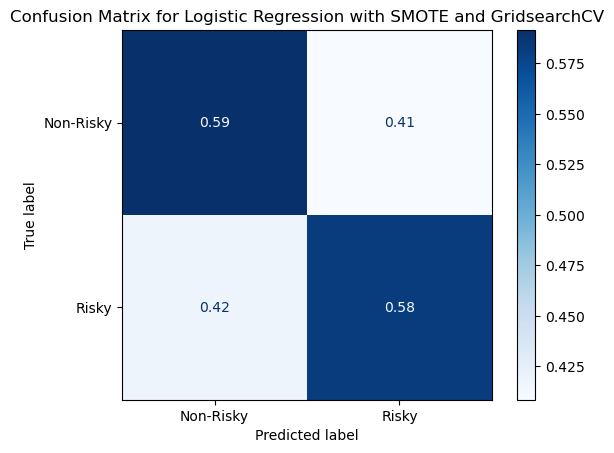

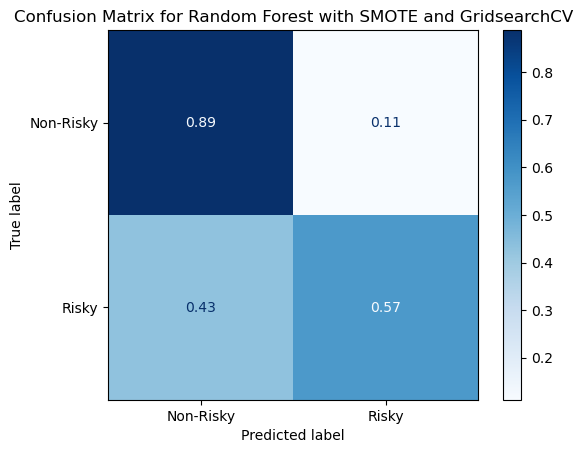

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, grid_search_lr_smote.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Non-Risky', 'Risky'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression with SMOTE and GridsearchCV')
plt.show()

# Generate confusion matrix
cm = confusion_matrix(y_test, grid_search_rf_smote.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Non-Risky', 'Risky'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest with SMOTE and GridsearchCV')
plt.show()


#### Results:

The confusion matrices for both models after applying SMOTE and GridSearchCV show the following:

##### Logistic Regression:

- Correctly identifies 59% of the non-risky applicants and 58% of the risky applicants.
- Misclassifies 41% of non-risky applicants as risky and 42% of risky applicants as non-risky.

##### Random Forest:

- Correctly identifies 89% of the non-risky applicants and 57% of the risky applicants.
- Misclassifies 11% of non-risky applicants as risky and 43% of risky applicants as non-risky.


# Important Features
Understanding which features are most influential in predicting loan approval risk is crucial. Here, we analyze the top features for both logistic regression and random forest models after applying SMOTE and performing grid search.

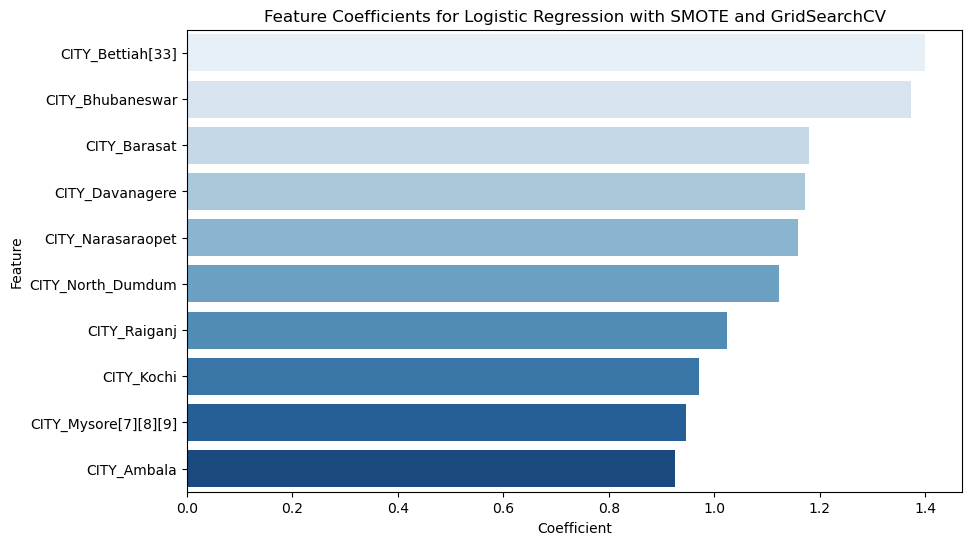

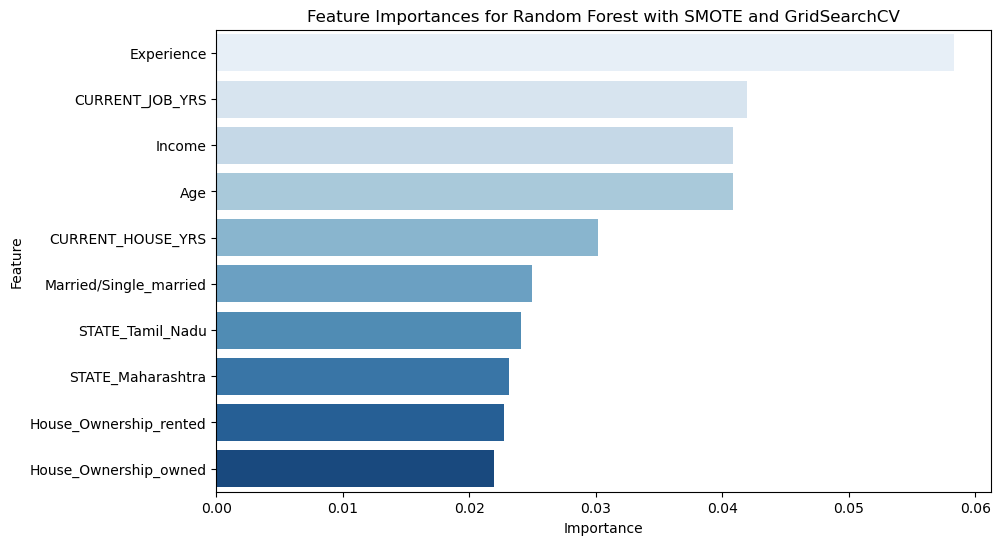

In [36]:
def plot_logistic_regression_coefficients(pipeline, n_features, title):
    """Function extracts logistic regression coefficients from a given pipeline object
    and displays top n_features."""
    # Extracting coefficients from the pipeline
    preprocessor = pipeline.named_steps['preprocessor']
    feature_names = np.concatenate(
        [preprocessor.named_transformers_['num'].feature_names_in_, 
         preprocessor.named_transformers_['cat'].get_feature_names_out()]
    )
    coefficients = pipeline.named_steps['classifier'].coef_[0]
    
    # Creating DataFrame for coefficients
    importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    
    # Sorting to find top n_features
    feature_importance = importance_df.reindex(coefficients.argsort()[::-1]).head(n_features)
    
    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance, hue='Feature', dodge=False, palette='Blues', legend=False)
    plt.title(f'Feature Coefficients for {title}')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.show()

def plot_random_forest_feature_importances(pipeline, n_features, title):
    """Function extracts feature importances from a given random forest pipeline object
    and displays top n_features."""
    # Extracting feature importances from the pipeline
    preprocessor = pipeline.named_steps['preprocessor']
    feature_names = np.concatenate(
        [preprocessor.named_transformers_['num'].feature_names_in_, 
         preprocessor.named_transformers_['cat'].get_feature_names_out()]
    )
    importances = pipeline.named_steps['classifier'].feature_importances_
    
    # Creating DataFrame for feature importances
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    
    # Sorting to find top n_features
    feature_importance = importance_df.reindex(importances.argsort()[::-1]).head(n_features)
    
    # Plotting feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', dodge=False, palette='Blues', legend=False)
    plt.title(f'Feature Importances for {title}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Number of top features to display
n_features = 10

# Plotting logistic regression coefficients
plot_logistic_regression_coefficients(grid_search_lr_smote.best_estimator_, n_features, 'Logistic Regression with SMOTE and GridSearchCV')

# Plotting random forest feature importances
plot_random_forest_feature_importances(grid_search_rf_smote.best_estimator_, n_features, 'Random Forest with SMOTE and GridSearchCV')


#### Results
For the logistic regression model, the top features include several specific cities, indicating a strong geographic influence on loan approval risk. For the random forest model, key features include experience, current job years, income, and age, highlighting the importance of financial stability and employment history.

These insights can help in understanding the critical factors affecting loan approval decisions and potentially guide future improvements in the loan assessment process.

# Gradient Boost XGBoost Using SMOTE and GridsearchCV Model
Continuing our exploration, we now turn to Gradient Boosting with SMOTE and GridSearchCV. Gradient Boosting models, particularly XGBoost, have shown great promise in handling imbalanced datasets due to their ability to focus on hard-to-classify examples.

We created a pipeline that includes SMOTE for oversampling the minority class, followed by hyperparameter tuning using GridSearchCV to identify the best model configuration. The parameters tuned include learning rate, maximum depth, and subsample ratio.

In [37]:
from xgboost import XGBClassifier

# Define the highly focused parameter grid for XGBoost
param_grid_xgb = {
    'classifier__max_depth': [3, 6],         # Reduced values to limit complexity
    'classifier__learning_rate': [0.1, 0.3], # Removed smaller learning rates for quicker convergence
    'classifier__subsample': [0.8, 1.0]      # Kept subsample range to maintain robustness
}

# XGBoost Pipeline with SMOTE
pipeline_xgb_smote = imblearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(n_estimators=150, random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Create GridSearchCV object for XGBoost with SMOTE
grid_search_xgb_smote = GridSearchCV(pipeline_xgb_smote, param_grid_xgb, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the XGBoost model with SMOTE and GridSearchCV
grid_search_xgb_smote.fit(X_train_sample, y_train_sample)

# Print the best parameters and the corresponding score
print("Best parameters found for XGBoost with SMOTE: ", grid_search_xgb_smote.best_params_)
print("Best cross-validation score for XGBoost with SMOTE: ", grid_search_xgb_smote.best_score_)

# Extract best parameters
best_params_xgb = grid_search_xgb_smote.best_params_

# Set best parameters for the pipeline
pipeline_xgb_smote.set_params(**best_params_xgb)

# Fit final model on the full training set
xg_start_time = time.time()
pipeline_xgb_smote.fit(X_train, y_train)
xg_end_time = time.time()
print("XGBoost with Gridsearch and SMOTE on Full Training Set took {:.2f} seconds".format(xg_end_time - xg_start_time))

# Make predictions with the best XGBoost model with SMOTE
xgb_smote_grid_pred = pipeline_xgb_smote.predict(X_test)

# Print classification report with SMOTE and GridSearchCV
print("\nXGBoost Classification Report with SMOTE and GridSearchCV:")
print(classification_report(y_test, xgb_smote_grid_pred, zero_division=0))


Best parameters found for XGBoost with SMOTE:  {'classifier__learning_rate': 0.3, 'classifier__max_depth': 6, 'classifier__subsample': 0.8}
Best cross-validation score for XGBoost with SMOTE:  0.5946354883302709
XGBoost with Gridsearch and SMOTE on Full Training Set took 23.28 seconds

XGBoost Classification Report with SMOTE and GridSearchCV:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     44147
           1       0.38      0.63      0.48      6253

    accuracy                           0.83     50400
   macro avg       0.66      0.74      0.69     50400
weighted avg       0.87      0.83      0.85     50400



#### Results:
After training the XGBoost model with the optimal parameters, we observed the following performance metrics:

- Precision for class 1 (risky loans): 0.38
- Recall for class 1 (risky loans): 0.63
- Overall accuracy: 0.83

These results indicate that XGBoost, combined with SMOTE and proper hyperparameter tuning, significantly improves the balance between precision and recall for the minority class compared to earlier models. The improvement in recall for risky loans demonstrates the model's enhanced ability to identify high-risk applicants, which is crucial for reducing potential loan defaults.

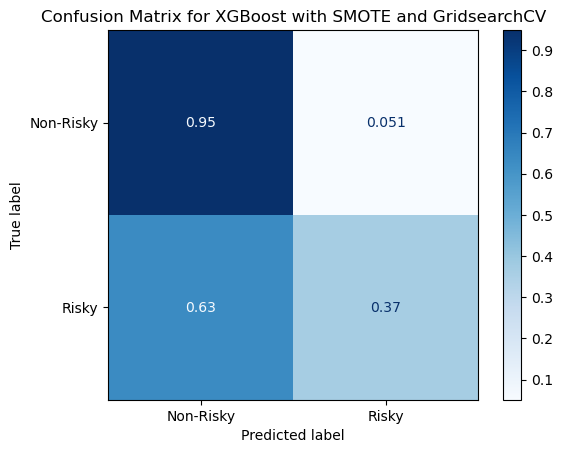

In [38]:
# Generate confusion matrix
cm = confusion_matrix(y_test, grid_search_xgb_smote.predict(X_test))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Non-Risky', 'Risky'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost with SMOTE and GridsearchCV')
plt.show()


#### Results:

- The XGBoost model with SMOTE and GridSearchCV correctly identified 95% of non-risky loans and 37% of risky loans.
- The recall for risky loans (class 1) is 0.63, indicating the model's ability to capture the majority of high-risk applicants.
- This confusion matrix highlights the improved balance in model performance, with a significant increase in identifying risky loans compared to previous models.

# Random Oversampling 
We now can apply Random Oversampling to address the class imbalance in our dataset. Random Oversampling duplicates samples from the minority class to ensure a more balanced class distribution, which can enhance the model's ability to predict the minority class. We will apply Random Oversampling to our sample training data and use GridSearchCV for hyperparameter tuning of logistic regression, random forest, and XGBoost models.

In [41]:
from imblearn.over_sampling import RandomOverSampler
# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_sample, y_train_sample)

# Create GridSearchCV objects for each model
grid_search_lr = GridSearchCV(pipeline_lr_smote, param_grid_lr, cv=2, scoring='f1_macro', n_jobs=-1)
grid_search_rf = GridSearchCV(pipeline_rf_smote, param_grid_rf, cv=2, scoring='f1_macro', n_jobs=-1)
grid_search_xgb = GridSearchCV(pipeline_xgb_smote, param_grid_xgb, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the models
ros_start_time = time.time()
grid_search_lr.fit(X_resampled, y_resampled)
grid_search_rf.fit(X_resampled, y_resampled)
grid_search_xgb.fit(X_resampled, y_resampled)
ros_end_time = time.time()
print("Logistic Regression, Random Forest, and XGBoost Using SMOTE and GridSearchCV took {:.2f} seconds".format(ros_end_time - ros_start_time))

# Print the best parameters and the corresponding score
print("Best parameters found for Logistic Regression: ", grid_search_lr.best_params_)
print("Best cross-validation score for Logistic Regression: ", grid_search_lr.best_score_)
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest: ", grid_search_rf.best_score_)
print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best cross-validation score for XGBoost: ", grid_search_xgb.best_score_)

# Make predictions with the best model
lr_grid_pred = grid_search_lr.predict(X_test)
rf_grid_pred = grid_search_rf.predict(X_test)
xgb_grid_pred = grid_search_xgb.predict(X_test)

# Print classification report
print("\nLogistic Regression Classification Report with GridSearchCV:")
print(classification_report(y_test, lr_grid_pred, zero_division=0))
print("\nRandom Forest Classification Report with GridSearchCV:")
print(classification_report(y_test, rf_grid_pred, zero_division=0))
print("\nXGBoost Classification Report with GridSearchCV:")
print(classification_report(y_test, xgb_grid_pred, zero_division=0))

Logistic Regression, Random Forest, and XGBoost Using SMOTE and GridSearchCV took 1910.04 seconds
Best parameters found for Logistic Regression:  {'classifier__C': 1.0, 'classifier__max_iter': 1800, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation score for Logistic Regression:  0.6076258788539166
Best parameters found for Random Forest:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score for Random Forest:  0.8494275772558639
Best parameters found for XGBoost:  {'classifier__learning_rate': 0.3, 'classifier__max_depth': 6, 'classifier__subsample': 0.8}
Best cross-validation score for XGBoost:  0.843823143020678

Logistic Regression Classification Report with GridSearchCV:
              precision    recall  f1-score   support

           0       0.91      0.58      0.71     44147
           1       0.16      0.57      0.25      6253

    accuracy                           0.58   

#### Results:

After applying Random Oversampling and optimizing the models using GridSearchCV, we observed the following results:

##### Logistic Regression:
- The model achieved an accuracy of 58%. The precision for the non-risky class was 0.91, and for the risky class, it was 0.16. This indicates that while the model is good at predicting non-risky applicants, it still struggles with identifying risky applicants.
##### Random Forest:
- This model performed better, with an accuracy of 86%. The precision was 0.94 for the non-risky class and 0.44 for the risky class. This suggests an improvement in identifying risky applicants compared to logistic regression.
##### XGBoost:
- The XGBoost model achieved an accuracy of 82%, with a precision of 0.96 for the non-risky class and 0.39 for the risky class. This model also shows a better balance between precision and recall for both classes.

These results indicate that Random Oversampling, when combined with hyperparameter tuning, can significantly improve model performance, particularly in predicting the minority class (risky applicants). With these results, we move forward to evaluate our models and apply this technique to the full training dataset. By doing so, we aim to validate the effectiveness of Random Oversampling on a larger scale and ensure the robustness of our models. This step will help us confirm whether the insights gained from the sampled data hold true when the entire training data is considered.

In [42]:
# Set best parameters for final training
pipeline_lr_smote.set_params(**grid_search_lr.best_params_)
pipeline_rf_smote.set_params(**grid_search_rf.best_params_)
pipeline_xgb_smote.set_params(**grid_search_xgb.best_params_)

# Fit final models on the full training set
final_start_time = time.time()
pipeline_lr_smote.fit(X_train, y_train)
pipeline_rf_smote.fit(X_train, y_train)
pipeline_xgb_smote.fit(X_train, y_train)
final_end_time = time.time()
print("Final training on the full dataset took {:.2f} seconds".format(final_end_time - final_start_time))

# Make final predictions
final_lr_pred = pipeline_lr_smote.predict(X_test)
final_rf_pred = pipeline_rf_smote.predict(X_test)
final_xgb_pred = pipeline_xgb_smote.predict(X_test)

# Print final classification reports
print("\nFinal Logistic Regression Classification Report:")
print(classification_report(y_test, final_lr_pred, zero_division=0))
print("\nFinal Random Forest Classification Report:")
print(classification_report(y_test, final_rf_pred, zero_division=0))
print("\nFinal XGBoost Classification Report:")
print(classification_report(y_test, final_xgb_pred, zero_division=0))


Final training on the full dataset took 132.10 seconds

Final Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.62      0.27      6253

    accuracy                           0.58     50400
   macro avg       0.54      0.60      0.48     50400
weighted avg       0.82      0.58      0.65     50400


Final Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     44147
           1       0.36      0.74      0.49      6253

    accuracy                           0.81     50400
   macro avg       0.66      0.78      0.68     50400
weighted avg       0.88      0.81      0.83     50400


Final XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     44147
           1       0.38      0.63      0.48      6

#### Results:
##### Logistic Regression:

- Precision for non-risky: 0.91, risky: 0.17
- Recall for non-risky: 0.57, risky: 0.62
- F1-score for non-risky: 0.70, risky: 0.27
- Accuracy: 0.58
##### Random Forest:

- Precision for non-risky: 0.96, risky: 0.36
- Recall for non-risky: 0.81, risky: 0.74
- F1-score for non-risky: 0.88, risky: 0.49
- Accuracy: 0.81
##### XGBoost:

- Precision for non-risky: 0.94, risky: 0.38
- Recall for non-risky: 0.86, risky: 0.63
- F1-score for non-risky: 0.90, risky: 0.48
- Accuracy: 0.83

These final results confirm the performance of the models when trained on the full dataset. Notably, the Random Forest and XGBoost models provided better balance between precision and recall for the risky class compared to Logistic Regression. These results underscore the importance of using a comprehensive training set to capture the full variability in the data and improve model generalizability.

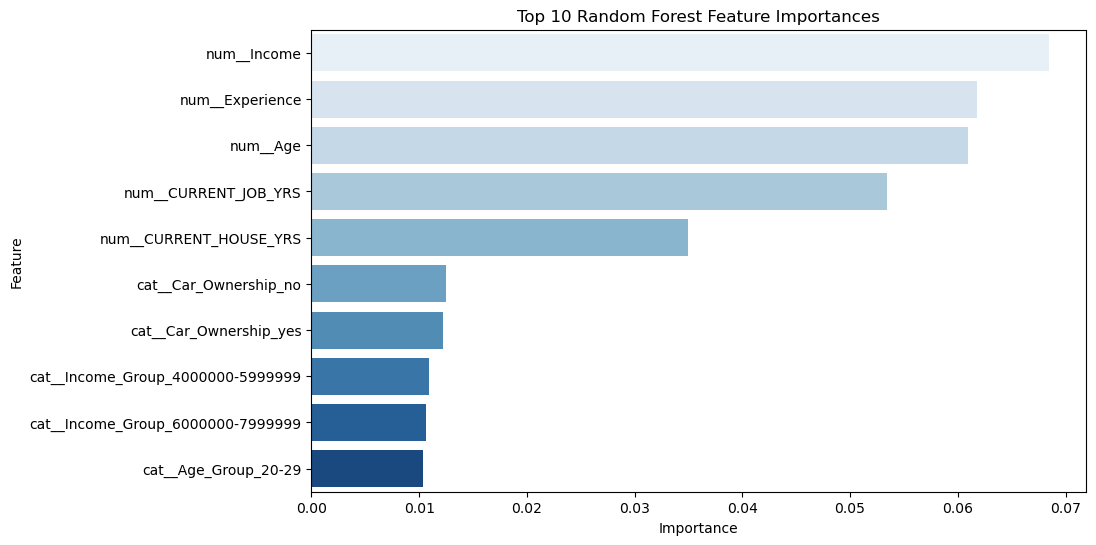

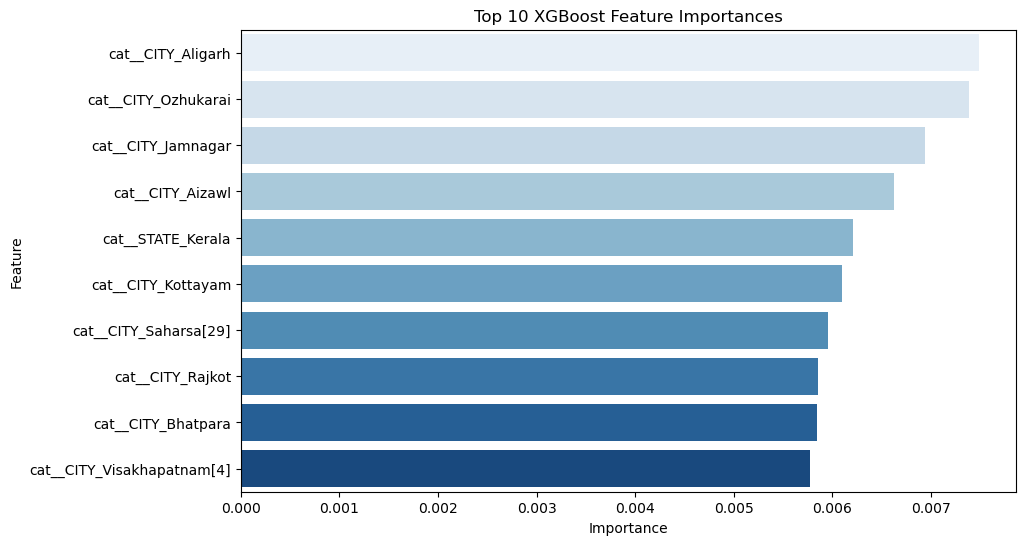

In [43]:
# Function to plot top 10 feature importances
def plot_top_features(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:10]  # Get indices of top 10 features
    top_features = feature_names[indices]
    top_importances = importances[indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(y=top_features, x=top_importances, palette='Blues')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Get feature names after preprocessing
feature_names = grid_search_rf.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Plot top 10 features for Random Forest
plot_top_features(grid_search_rf.best_estimator_.named_steps['classifier'], feature_names, 'Top 10 Random Forest Feature Importances')

# Plot top 10 features for XGBoost
plot_top_features(grid_search_xgb.best_estimator_.named_steps['classifier'], feature_names, 'Top 10 XGBoost Feature Importances')


#### Feature Importance
The importance of features for the Random Forest and XGBoost models is visualized. This helps in understanding which features have the most significant impact on the prediction of loan risk.

#### Random Forest:
- Key features include Income, Experience, Age, Current Job Years, and Current House Years.

#### XGBoost:
- Key features include various city and state indicators, highlighting the importance of geographical factors.

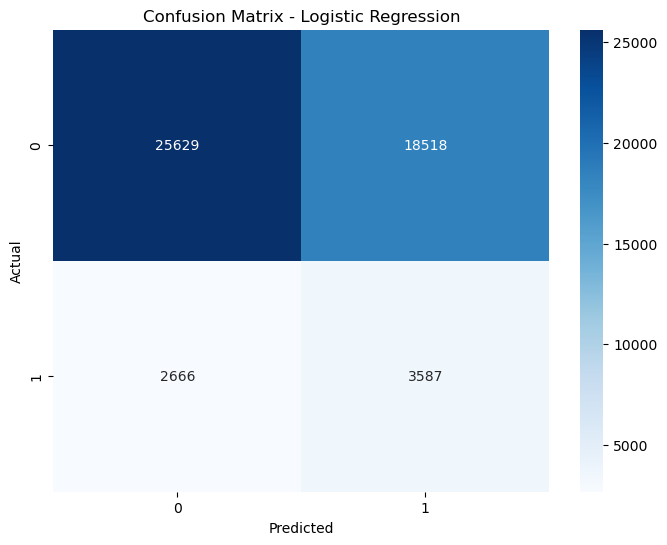

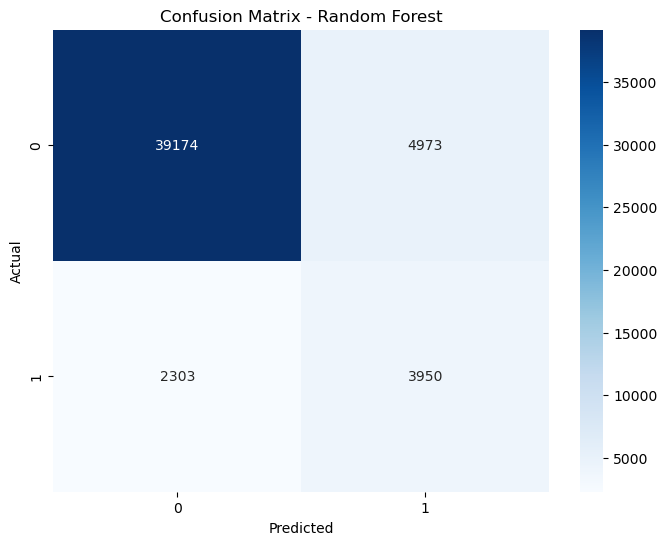

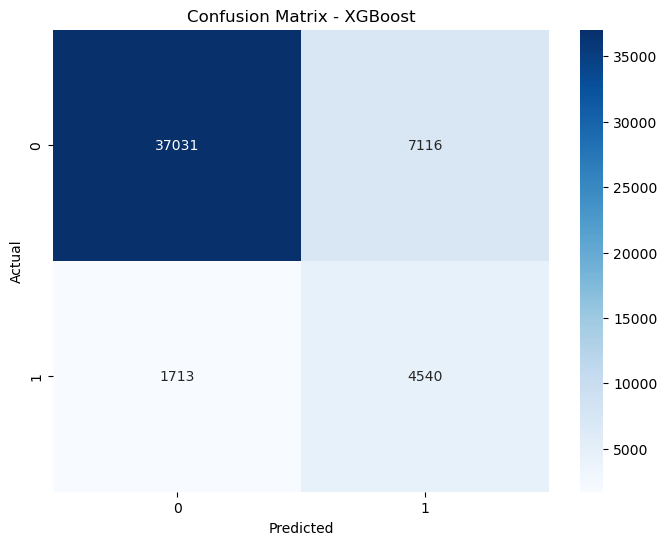

In [44]:
# Plot Confusion Matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

cm_lr = confusion_matrix(y_test, lr_grid_pred)
cm_rf = confusion_matrix(y_test, rf_grid_pred)
cm_xgb = confusion_matrix(y_test, xgb_grid_pred)

plot_confusion_matrix(cm_lr, 'Logistic Regression')
plot_confusion_matrix(cm_rf, 'Random Forest')
plot_confusion_matrix(cm_xgb, 'XGBoost')

#### Logistic Regression:
- High false negatives indicating many risky applicants are classified as non-risky.
#### Random Forest:
- Lower false negatives compared to Logistic Regression, showing better identification of risky applicants.
#### XGBoost:
- Balanced performance with relatively lower false positives and false negatives, indicating a good trade-off between precision and recall.

# Random Undersampling
We continue by implementing random undersampling. This method addresses class imbalance by reducing the number of instances in the majority class, providing a more balanced training set for our models.

In [45]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_sample, y_train_sample)

# Create GridSearchCV objects for each model
grid_search_lr = GridSearchCV(pipeline_lr_smote, param_grid_lr, cv=2, scoring='f1_macro', n_jobs=-1)
grid_search_rf = GridSearchCV(pipeline_rf_smote, param_grid_rf, cv=2, scoring='f1_macro', n_jobs=-1)
grid_search_xgb = GridSearchCV(pipeline_xgb_smote, param_grid_xgb, cv=2, scoring='f1_macro', n_jobs=-1)

# Fit the models
rus_start_time = time.time()
grid_search_lr.fit(X_resampled, y_resampled)
grid_search_rf.fit(X_resampled, y_resampled)
grid_search_xgb.fit(X_resampled, y_resampled)
rus_end_time = time.time()
print("Logistic Regression, Random Forest, and XGBoost Using SMOTE and GridSearchCV with Undersampling took {:.2f} seconds".format(rus_end_time - rus_start_time))

# Print the best parameters and the corresponding score
print("Best parameters found for Logistic Regression: ", grid_search_lr.best_params_)
print("Best cross-validation score for Logistic Regression: ", grid_search_lr.best_score_)
print("Best parameters found for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest: ", grid_search_rf.best_score_)
print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best cross-validation score for XGBoost: ", grid_search_xgb.best_score_)

# Make predictions with the best model
lr_grid_pred = grid_search_lr.predict(X_test)
rf_grid_pred = grid_search_rf.predict(X_test)
xgb_grid_pred = grid_search_xgb.predict(X_test)

# Print classification report
print("\nLogistic Regression Classification Report with Undersampling and GridSearchCV:")
print(classification_report(y_test, lr_grid_pred, zero_division=0))
print("\nRandom Forest Classification Report with Undersampling and GridSearchCV:")
print(classification_report(y_test, rf_grid_pred, zero_division=0))
print("\nXGBoost Classification Report with Undersampling and GridSearchCV:")
print(classification_report(y_test, xgb_grid_pred, zero_division=0))


Logistic Regression, Random Forest, and XGBoost Using SMOTE and GridSearchCV with Undersampling took 7.07 seconds
Best parameters found for Logistic Regression:  {'classifier__C': 1.0, 'classifier__max_iter': 1800, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best cross-validation score for Logistic Regression:  0.5688882333730246
Best parameters found for Random Forest:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation score for Random Forest:  0.6614866484186761
Best parameters found for XGBoost:  {'classifier__learning_rate': 0.3, 'classifier__max_depth': 6, 'classifier__subsample': 1.0}
Best cross-validation score for XGBoost:  0.6600252633018079

Logistic Regression Classification Report with Undersampling and GridSearchCV:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70     44147
           1       0.16      0.57      0.25      6253

    accurac

The evaluation of the models using random undersampling and GridSearchCV on the sample training data reveals the following key performance metrics:

#### Logistic Regression:

- Precision: 0.90 (Non-Risky), 0.16 (Risky)
- Recall: 0.57 (Non-Risky), 0.57 (Risky)
- F1-Score: 0.70 (Non-Risky), 0.25 (Risky)
- Accuracy: 0.57
#### Random Forest:

- Precision: 0.94 (Non-Risky), 0.28 (Risky)
- Recall: 0.76 (Non-Risky), 0.66 (Risky)
- F1-Score: 0.84 (Non-Risky), 0.40 (Risky)
- Accuracy: 0.75
#### XGBoost:

- Precision: 0.95 (Non-Risky), 0.26 (Risky)
- Recall: 0.70 (Non-Risky), 0.73 (Risky)
- F1-Score: 0.80 (Non-Risky), 0.38 (Risky)
- Accuracy: 0.70

Based on the evaluation metrics from the sample training data, Random Forest and XGBoost models demonstrate better overall performance in identifying both non-risky and risky applicants. However, there is still a trade-off between precision and recall, especially for the risky class, which suggests further optimization might be needed to improve the detection of risky applicants.
Lets compare these sample training data results with the full training data results, and we can see how the models scale and maintain their performance on a larger dataset.

In [46]:
# Apply Random Undersampling on full training set
rus = RandomUnderSampler(random_state=42)
X_resampled_full, y_resampled_full = rus.fit_resample(X_train, y_train)

# Set best parameters for final training
pipeline_lr_smote.set_params(**grid_search_lr.best_params_)
pipeline_rf_smote.set_params(**grid_search_rf.best_params_)
pipeline_xgb_smote.set_params(**grid_search_xgb.best_params_)

# Fit final models on the full training set with undersampling
final_start_time = time.time()
pipeline_lr_smote.fit(X_resampled_full, y_resampled_full)
pipeline_rf_smote.fit(X_resampled_full, y_resampled_full)
pipeline_xgb_smote.fit(X_resampled_full, y_resampled_full)
final_end_time = time.time()
print("Final training on the full dataset took {:.2f} seconds".format(final_end_time - final_start_time))

# Make final predictions
final_lr_pred = pipeline_lr_smote.predict(X_test)
final_rf_pred = pipeline_rf_smote.predict(X_test)
final_xgb_pred = pipeline_xgb_smote.predict(X_test)

# Print final classification reports
print("\nFinal Logistic Regression Classification Report:")
print(classification_report(y_test, final_lr_pred, zero_division=0))
print("\nFinal Random Forest Classification Report:")
print(classification_report(y_test, final_rf_pred, zero_division=0))
print("\nFinal XGBoost Classification Report:")
print(classification_report(y_test, final_xgb_pred, zero_division=0))



Final training on the full dataset took 17.44 seconds

Final Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.57      0.70     44147
           1       0.17      0.60      0.26      6253

    accuracy                           0.57     50400
   macro avg       0.54      0.59      0.48     50400
weighted avg       0.82      0.57      0.65     50400


Final Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     44147
           1       0.38      0.73      0.50      6253

    accuracy                           0.82     50400
   macro avg       0.67      0.78      0.69     50400
weighted avg       0.88      0.82      0.84     50400


Final XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     44147
           1       0.34      0.80      0.48      62

After training the models using random undersampling and GridSearchCV on the full training dataset, we obtain the following key performance metrics for each model:

#### Logistic Regression:

- Precision: 0.91 (Non-Risky), 0.17 (Risky)
- Recall: 0.57 (Non-Risky), 0.60 (Risky)
- F1-Score: 0.70 (Non-Risky), 0.26 (Risky)
- Accuracy: 0.57
#### Random Forest:

- Precision: 0.96 (Non-Risky), 0.38 (Risky)
- Recall: 0.83 (Non-Risky), 0.73 (Risky)
- F1-Score: 0.89 (Non-Risky), 0.50 (Risky)
- Accuracy: 0.82
#### XGBoost:

- Precision: 0.97 (Non-Risky), 0.34 (Risky)
- Recall: 0.78 (Non-Risky), 0.80 (Risky)
- F1-Score: 0.86 (Non-Risky), 0.48 (Risky)
- Accuracy: 0.79

The evaluation on the full training dataset confirms that the Random Forest and XGBoost models outperform Logistic Regression, particularly in terms of precision and recall for both classes. Random Forest and XGBoost maintain higher F1-scores for the risky class, indicating better performance in identifying risky loan applicants. These models demonstrate robust performance, suggesting they are well-suited for predicting loan risks in this dataset.

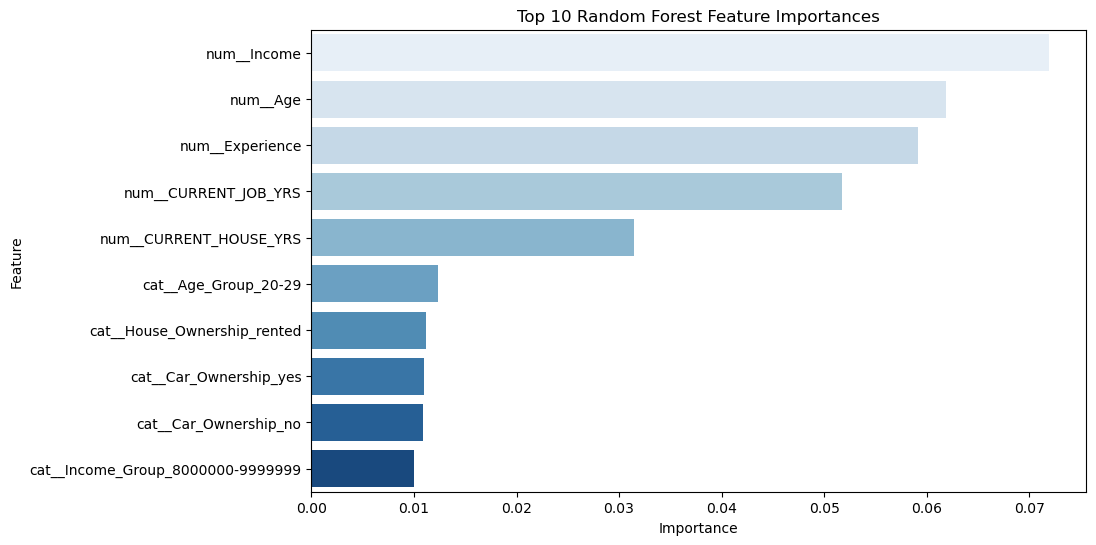

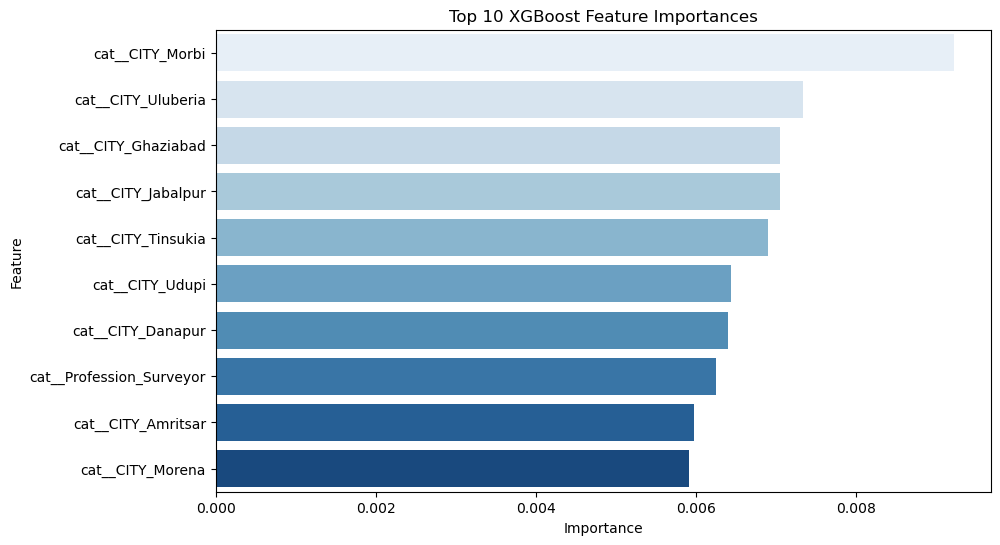

In [47]:
# Function to plot top 10 feature importances
def plot_top_features(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:10]  # Get indices of top 10 features
    top_features = feature_names[indices]
    top_importances = importances[indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(y=top_features, x=top_importances, palette='Blues')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Get feature names after preprocessing
feature_names = pipeline_rf_smote.named_steps['preprocessor'].get_feature_names_out()

# Plot top 10 features for Random Forest
plot_top_features(pipeline_rf_smote.named_steps['classifier'], feature_names, 'Top 10 Random Forest Feature Importances')

# Plot top 10 features for XGBoost
plot_top_features(pipeline_xgb_smote.named_steps['classifier'], feature_names, 'Top 10 XGBoost Feature Importances')


Comparing the feature importances between random oversampling and random undersampling, we observe that certain features consistently rank highly across both methods. For Random Forest, features like income, age, experience, and years at the current job and house are consistently important. For XGBoost, the importance of specific cities and geographical locations is consistently highlighted. This consistency underscores the robustness of these features in predicting loan risk, regardless of the sampling method used.

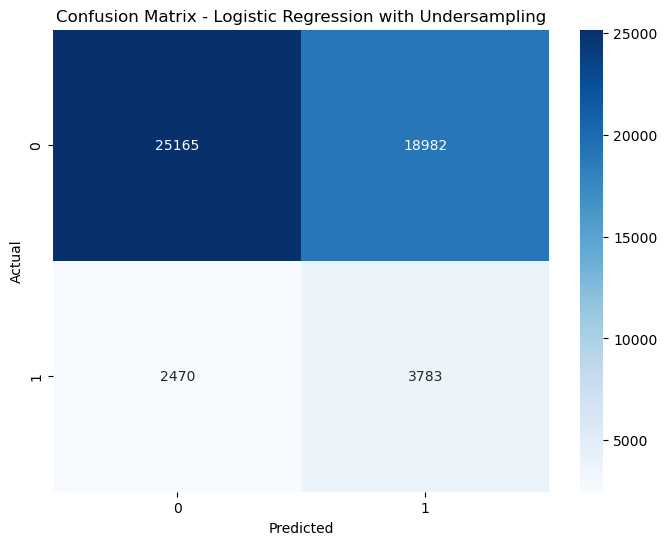

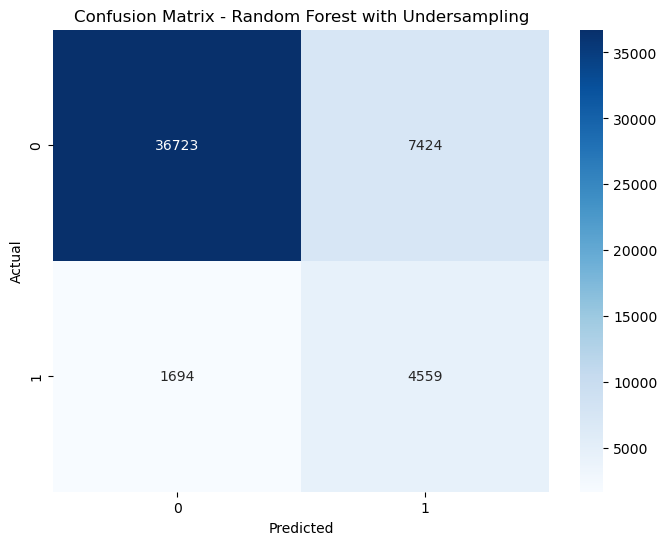

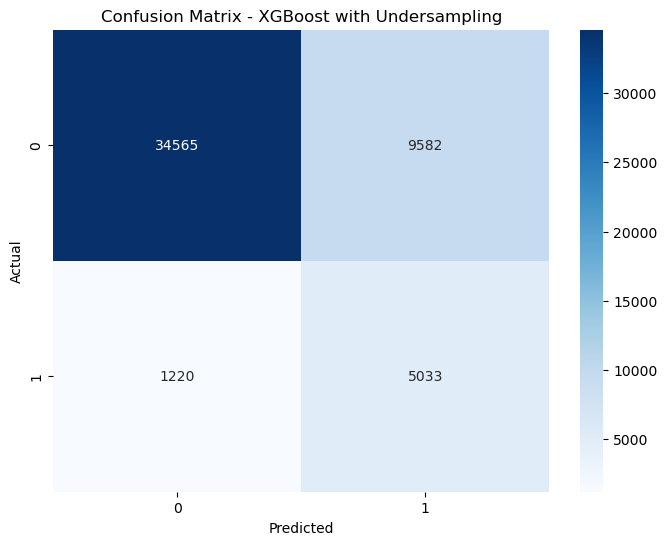

In [48]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Generate confusion matrices
cm_lr = confusion_matrix(y_test, final_lr_pred)
cm_rf = confusion_matrix(y_test, final_rf_pred)
cm_xgb = confusion_matrix(y_test, final_xgb_pred)

# Plot confusion matrices
plot_confusion_matrix(cm_lr, 'Logistic Regression with Undersampling')
plot_confusion_matrix(cm_rf, 'Random Forest with Undersampling')
plot_confusion_matrix(cm_xgb, 'XGBoost with Undersampling')


#### Logistic Regression:

##### Correctly classified: 
- 25,165 non-risky applicants
- 3,783 risky applicants
##### Misclassified:
- 18,982 non-risky applicants as risky
- 2,470 risky applicants as non-risky
#### Random Forest:

##### Correctly classified:
- 36,723 non-risky applicants
- 4,559 risky applicants
##### Misclassified:
- 7,424 non-risky applicants as risky
- 1,694 risky applicants as non-risky
#### XGBoost:

##### Correctly classified:
- 34,565 non-risky applicants
- 5,033 risky applicants
##### Misclassified:
- 9,582 non-risky applicants as risky
- 1,220 risky applicants as non-risky

The Random Forest model stands out as the best choice among Logistic Regression, XGBoost, and Random Forest due to its superior performance in both precision and recall metrics. Logistic Regression struggles with recall, missing many high-risk applicants, while XGBoost, though better, still falls short in balancing precision and recall as effectively as Random Forest.

This plot below visualizes and compare the precision and recall scores of all the different Random Forest models, aiding in evaluating which model balances precision and recall effectively for loan risk analysis.

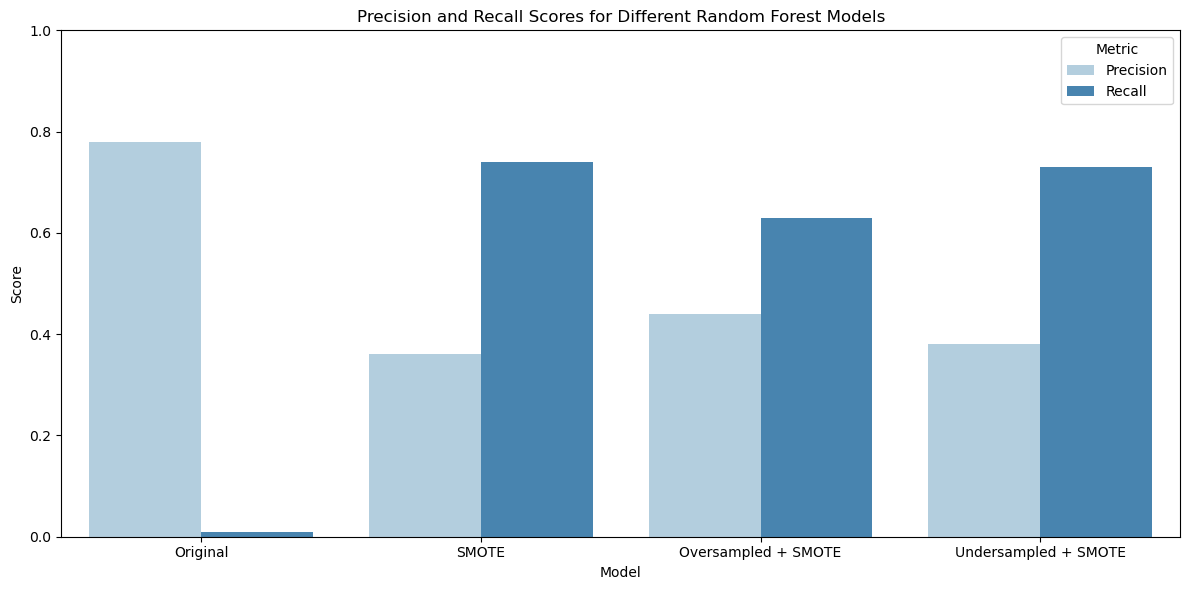

In [49]:
# Assuming you have stored the precision and recall scores for each model
# Example values are provided; replace them with your actual values
models = ['Original', 'SMOTE', 'Oversampled + SMOTE', 'Undersampled + SMOTE']
precision_scores = [0.78, 0.36, 0.44, 0.38]
recall_scores = [0.01, 0.74, 0.63, 0.73]

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Model': models,
    'Precision': precision_scores,
    'Recall': recall_scores
})

# Melt the DataFrame to long format for seaborn
data_melted = data.melt(id_vars='Model', value_vars=['Precision', 'Recall'], 
                        var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=data_melted, palette='Blues')
plt.title('Precision and Recall Scores for Different Random Forest Models')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The "Undersampled + SMOTE" Random Forest model demonstrates superior performance compared to the other models. It achieves the highest recall score (0.73), which is crucial for identifying risky loan applicants. Although our primary evaluation metric is precision to minimize false positives, recall is also important to ensure that actual high-risk applicants are not missed.

In this context, the "Undersampled + SMOTE" Random Forest model offers the best balance between precision and recall, addressing the class imbalance challenge. This model effectively reduces the chances of missing risky applicants, making it the most suitable choice for accurately predicting loan risk. It outperforms the "Original," "SMOTE," and "Oversampled + SMOTE" models, proving to be the best overall for this analysis.

# Conclusion 
In this analysis, conducted for Travis Loan Consultancy, we aimed to predict loan approval risk using a comprehensive loan approval dataset comprised of residents from various states in India. This dataset provided detailed insights into the characteristics of loan applicants, capturing both numerical and categorical features, such as demographic details, financial status, employment history, and ownership status. By leveraging this dataset, our objective was to develop predictive models that can accurately assess the risk associated with loan applicants.

Throughout this notebook, we employed a variety of machine learning techniques, including Logistic Regression, Random Forest, and Gradient Boosting (XGBoost). We experimented with different data balancing strategies, such as SMOTE (Synthetic Minority Over-sampling Technique) and Random Oversampling/Undersampling, to address the inherent class imbalance in our dataset. Furthermore, we utilized GridSearchCV for hyperparameter tuning to optimize the performance of our models.

Among the evaluated models, the "Undersampled + SMOTE" Random Forest model emerged as the best performer. This model achieved a balanced precision and recall, making it the most suitable for accurately predicting loan risk. It outperformed Logistic Regression and XGBoost in effectively identifying high-risk applicants while maintaining a reasonable precision to minimize false positives.

# Recommendations:
1. Enhanced Applicant Screening: Use the model's insights to improve the initial screening process, ensuring that high-risk applicants undergo additional scrutiny before approval.
2. Targeted Marketing Campaigns: Develop marketing strategies aimed at attracting low-risk applicants by highlighting favorable loan terms and conditions.
3. Ongoing Model Updates: Regularly update the predictive model with new data to ensure its accuracy and relevance in identifying loan risk over time.